In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/multivariate_housing_prices_in_portlans_oregon.csv')
df.head() # To get first n rows from the dataset default value of n is 5

,size(in square feet),number of bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
X = df.values[:, 0:2]  # get input values from first two columns
y = df.values[:, 2]  # get output values from last coulmn
m = len(y) # Number of training examples

print('Total no of training examples (m) = %s \n' %(m))

# Show only first 5 records
for i in range(5):
    print('x =', X[i, ], ', y =', y[i])

Total no of training examples (m) = 47 

x = [2104    3] , y = 399900
x = [1600    3] , y = 329900
x = [2400    3] , y = 369000
x = [1416    2] , y = 232000
x = [3000    4] , y = 539900


In [5]:
def feature_normalize(X):
    mu = np.mean(X, axis = 0)  
    sigma = np.std(X, axis= 0, ddof = 1) 
    X_norm = (X - mu)/sigma
    return X_norm, mu, sigma

In [6]:
X, mu, sigma = feature_normalize(X)

print('mu= ', mu)
print('sigma= ', sigma)
print('X_norm= ', X[:5])

mu=  [2000.68085106    3.17021277]
sigma=  [7.94702354e+02 7.60981887e-01]
X_norm=  [[ 0.13000987 -0.22367519]
 [-0.50418984 -0.22367519]
 [ 0.50247636 -0.22367519]
 [-0.73572306 -1.53776691]
 [ 1.25747602  1.09041654]]


In [7]:
mu_testing = np.mean(X, axis = 0) # mean
mu_testing

array([3.77948264e-17, 2.74603035e-16])

In [8]:
sigma_testing = np.std(X, axis = 0, ddof = 1) # mean
sigma_testing

array([1., 1.])

In [9]:
# Lets use hstack() function from numpy to add column of ones to X feature 
# This will be our final X matrix (feature matrix)
X = np.hstack((np.ones((m,1)), X))
X[:5]

array([[ 1.        ,  0.13000987, -0.22367519],
       [ 1.        , -0.50418984, -0.22367519],
       [ 1.        ,  0.50247636, -0.22367519],
       [ 1.        , -0.73572306, -1.53776691],
       [ 1.        ,  1.25747602,  1.09041654]])

In [10]:
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1/(2 * m) * errors.T.dot(errors)
    return J

In [11]:
def gradient_descent(X, y, theta, alpha, iterations):

    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
    cost_history[i] = compute_cost(X, y, theta)  
    return theta, cost_history

In [12]:
# We need theta parameter for every input variable. since we have three input variable including X_0 (column of ones)
theta = np.zeros(3)
iterations = 400;
alpha = 0.15;

In [13]:
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('First 5 values from cost_history =', cost_history[:5])
print('Last 5 values from cost_history =', cost_history[-5 :])

Final value of theta = [340412.65957447 110631.0502787   -6649.47427067]
First 5 values from cost_history = [0. 0. 0. 0. 0.]
Last 5 values from cost_history = [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.04328005e+09]


Text(0.5, 1.0, 'Convergence of gradient descent')

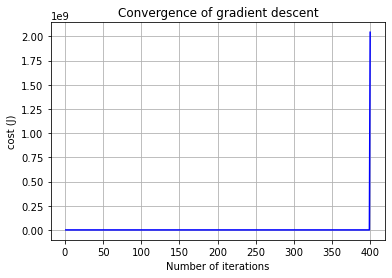

In [14]:
import matplotlib.pyplot as plt
plt.plot(range(1, iterations +1), cost_history, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Convergence of gradient descent")

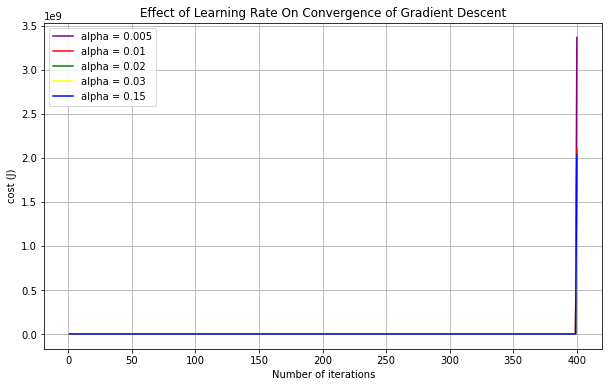

In [15]:
iterations = 400;
theta = np.zeros(3)

alpha = 0.005;
theta_1, cost_history_1 = gradient_descent(X, y, theta, alpha, iterations)

alpha = 0.01;
theta_2, cost_history_2 = gradient_descent(X, y, theta, alpha, iterations)

alpha = 0.02;
theta_3, cost_history_3 = gradient_descent(X, y, theta, alpha, iterations)

alpha = 0.03;
theta_4, cost_history_4 = gradient_descent(X, y, theta, alpha, iterations)

alpha = 0.15;
theta_5, cost_history_5 = gradient_descent(X, y, theta, alpha, iterations)

plt.plot(range(1, iterations +1), cost_history_1, color ='purple', label = 'alpha = 0.005')
plt.plot(range(1, iterations +1), cost_history_2, color ='red', label = 'alpha = 0.01')
plt.plot(range(1, iterations +1), cost_history_3, color ='green', label = 'alpha = 0.02')
plt.plot(range(1, iterations +1), cost_history_4, color ='yellow', label = 'alpha = 0.03')
plt.plot(range(1, iterations +1), cost_history_5, color ='blue', label = 'alpha = 0.15')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Effect of Learning Rate On Convergence of Gradient Descent")
plt.legend()

Text(0.5, 1.0, 'Effect of Large Learning Rate On Convergence of Gradient Descent')

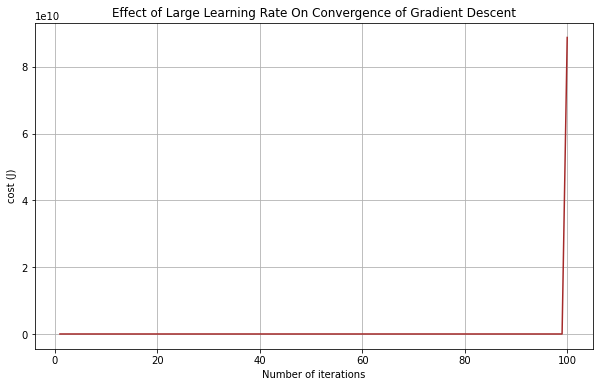

In [16]:
iterations = 100;
theta = np.zeros(3)

alpha = 1.32;
theta_6, cost_history_6 = gradient_descent(X, y, theta, alpha, iterations)

plt.plot(range(1, iterations +1), cost_history_6, color ='brown')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Effect of Large Learning Rate On Convergence of Gradient Descent")

In [18]:
normalize_test_data = ((np.array([1650, 3]) - mu) / sigma)
normalize_test_data = np.hstack((np.ones(1), normalize_test_data))
price = normalize_test_data.dot(theta)
print('Predicted price of a 1650 sq-ft, 3 br house:', price)

Predicted price of a 1650 sq-ft, 3 br house: 0.0
